 ### CASE STUDY
    
1. Data Cleaning & Preparation
   Assess data quality by identifying missing values, duplicates, and inconsistent data types. 
    Ensure the data is cleaned and formatted for further analysis. 
    This includes creating the "Month-Year" column for time-based analysis.
    
2. Sales Overview & Trend Analysis
    Provide a comprehensive overview of sales performance by calculating total Quantity and Value grouped by product category and business.
    Visualize these metrics and identify seasonal trends using time-series analysis.

3. Performance Analysis of Products
   Identify the top 5 products based on both Quantity and Value to understand which items are performing the best.
    This allows for strategic decisions on inventory, pricing, and marketing.

4. Customer Segmentation & Forecasting
   Segment businesses based on their purchase behavior and forecast future sales for the next 3 months using appropriate time-series methods 
   (e.g., ARIMA or exponential smoothing). 
   Use these insights to drive targeted marketing and inventory strategies.

5. Anomaly Detection & Correlation Analysis
   Identify any anomalous spikes or drops in sales performance and analyze the relationships between Quantity and Value to uncover key drivers of sales.

6. Strategic Insights & Operational Recommendations
   Provide actionable insights on Product Strategy, Customer Retention, and Operational Efficiency, leveraging the analysis to suggest ways to improve marketing, inventory, and customer engagement strategies.

In [17]:
#import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [18]:
#load the data
df = pd.read_csv('Case_study.csv')
df.head()

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE
0,"August 18, 2024, 9:32 PM",Category-106,Product-21f4,Business-de42,Location-1ba8,1,850
1,"August 18, 2024, 9:32 PM",Category-120,Product-4156,Business-de42,Location-1ba8,2,"1,910"
2,"August 18, 2024, 9:32 PM",Category-121,Product-49bd,Business-de42,Location-1ba8,1,"3,670"
3,"August 18, 2024, 9:32 PM",Category-76,Product-61dd,Business-de42,Location-1ba8,1,"2,605"
4,"August 18, 2024, 9:32 PM",Category-119,Product-66e0,Business-de42,Location-1ba8,5,"1,480"


### UNDERSTAND THE DATAFRAME STRUCTURE

In [3]:
#dimension of the dataframe
df.shape

(333405, 7)

In [4]:
#check for column datatypes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333405 entries, 0 to 333404
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   DATE                 333405 non-null  object
 1   ANONYMIZED CATEGORY  333405 non-null  object
 2   ANONYMIZED PRODUCT   333405 non-null  object
 3   ANONYMIZED BUSINESS  333405 non-null  object
 4   ANONYMIZED LOCATION  333405 non-null  object
 5   QUANTITY             333405 non-null  int64 
 6   UNIT PRICE           333397 non-null  object
dtypes: int64(1), object(6)
memory usage: 17.8+ MB


Our dataset has 333,405 rows and 7 columns and no null values.We also observe that there is a mix of data types.

. Date:  timestamp of the transaction
    
. Anonymized category:  product category 
    
. Anonymized product:  specific product within the category
    
. Anonymized businnes:  company or outlet selling the product
    
. Anonymized location:  geographic location of the sale
    
. Quantity:  number of items purchased
    
. Unit price:  price per product.


In [19]:
#check for column names
df.columns

Index(['DATE', 'ANONYMIZED CATEGORY', 'ANONYMIZED PRODUCT',
       'ANONYMIZED BUSINESS', 'ANONYMIZED LOCATION', 'QUANTITY', 'UNIT PRICE'],
      dtype='object')

In [20]:
#check for the missing values 
df.isnull().sum()

DATE                   0
ANONYMIZED CATEGORY    0
ANONYMIZED PRODUCT     0
ANONYMIZED BUSINESS    0
ANONYMIZED LOCATION    0
QUANTITY               0
UNIT PRICE             8
dtype: int64

In [21]:
# Check the rows with missing UnitPrice
missing_rows = df[df['UNIT PRICE'].isna()]
print(f"Rows with missing UnitPrice:\n{missing_rows}")

Rows with missing UnitPrice:
                              DATE ANONYMIZED CATEGORY ANONYMIZED PRODUCT  \
108112       July 3, 2024, 5:53 PM         Category-94       Product-3d7f   
150961  December 16, 2024, 6:33 PM         Category-79       Product-dfc8   
151142  December 22, 2024, 2:42 PM        Category-122       Product-15e0   
272379     June 27, 2024, 12:15 PM         Category-92       Product-ccbc   
278284    August 14, 2024, 9:09 PM        Category-101       Product-84a5   
278384  December 30, 2024, 2:17 PM         Category-95       Product-15f3   
310385     March 31, 2024, 2:03 PM        Category-114       Product-9204   
327152    August 13, 2024, 4:20 PM        Category-107       Product-7eed   

       ANONYMIZED BUSINESS ANONYMIZED LOCATION  QUANTITY UNIT PRICE  
108112       Business-4fce       Location-f37d         2        NaN  
150961       Business-8bbf       Location-3fc0         1        NaN  
151142       Business-c575       Location-1979         3        NaN

In [22]:
## Drop rows with missing UnitPrice
df= df.dropna(subset=['UNIT PRICE'])
#save the cleaned dataset
df.to_csv("cleaned_data.csv", index=False)
# Save the dropped rows to a CSV for reference
missing_rows.to_csv("dropped_rows.csv", index=False)

#### handling missing values


The UnitPrice column has 8 missing values and the original dataset had 333,405 rows.
Although,these values are critical for analysis and imputation is not suitable, for accurate analysis we drop the values.
After dropping 8 rows with missing values in UnitPrice, the dataset now has 333,397 rows.



In [24]:
#check for duplicated values
duplicate_count = df.duplicated().sum()
print(f"Total Duplicates: {duplicate_count}")

Total Duplicates: 3524


In [25]:
# a detailed view of duplicate rows
df[df.duplicated(keep=False)]

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE
310,"May 17, 2024, 8:27 PM",Category-120,Product-1e80,Business-9909,Location-689f,1,"1,970"
311,"May 17, 2024, 8:27 PM",Category-75,Product-8f75,Business-9909,Location-689f,1,"4,020"
426,"January 31, 2024, 7:34 PM",Category-76,Product-e805,Business-bf85,Location-1ba8,5,"7,018"
526,"February 5, 2024, 6:24 PM",Category-120,Product-29ee,Business-bfcd,Location-3e32,5,"2,290"
570,"April 19, 2024, 3:19 PM",Category-75,Product-086d,Business-b48e,Location-03fc,3,"2,090"
...,...,...,...,...,...,...,...
333133,"February 1, 2024, 9:17 AM",Category-111,Product-7fac,Business-4919,Location-3e32,3,814
333134,"February 1, 2024, 9:17 AM",Category-77,Product-d09c,Business-4919,Location-3e32,1,"3,200"
333350,"June 10, 2024, 10:08 PM",Category-76,Product-e805,Business-54ad,Location-3e32,5,"5,965"
333399,"January 9, 2024, 8:49 PM",Category-97,Product-bbdc,Business-f9ff,Location-1979,1,341


#### Handling Duplicates

There are 5,706 duplicate rows in the dataset. 

The duplicates are not errors but rather represent meaningful transactions.

This is because each row reflects distinct purchase events, occurring at the same day,time and same locations involving different quantities and unitprice for different products.

Therefore, it's prudent to retain the duplicates for the analysis:

    
. Each duplicate row represents a valid transaction with distinct details.
    
. Removing duplicates would lead to loss of information and lead to inaccurate conclusiions about total sales, trends and customer behaviour.

In [26]:
#renaming the columns to preferred right case
df.columns = [
    'Date', 
    'Anonymized category', 
    'Anonymized product', 
    'Anonymized business', 
    'Anonymized location', 
    'Quantity', 
    'UnitPrice'
]

In [27]:
# confirm the changes in column names
df.columns

Index(['Date', 'Anonymized category', 'Anonymized product',
       'Anonymized business', 'Anonymized location', 'Quantity', 'UnitPrice'],
      dtype='object')

In [28]:
#Inconsistent Data Types
#Convert DATE column to datetime format.
#Remove commas and convert UNIT PRICE to float
# Add new column 'Total_Value' as a product of 'Quantity'* 'UnitPrice'

df['Date'] = pd.to_datetime(df['Date'])

df['UnitPrice'] = df['UnitPrice'].str.replace(',', '').astype(float)

df['Total_Value'] = df['Quantity'] * df['UnitPrice']

In [29]:
df.head()

,Date,Anonymized category,Anonymized product,Anonymized business,Anonymized location,Quantity,UnitPrice,Total_Value
0,2024-08-18 21:32:00,Category-106,Product-21f4,Business-de42,Location-1ba8,1,850.0,850.0
1,2024-08-18 21:32:00,Category-120,Product-4156,Business-de42,Location-1ba8,2,1910.0,3820.0
2,2024-08-18 21:32:00,Category-121,Product-49bd,Business-de42,Location-1ba8,1,3670.0,3670.0
3,2024-08-18 21:32:00,Category-76,Product-61dd,Business-de42,Location-1ba8,1,2605.0,2605.0
4,2024-08-18 21:32:00,Category-119,Product-66e0,Business-de42,Location-1ba8,5,1480.0,7400.0


By making a copy of the dataframe, we can conduct an indepth analysis of the data's properties, gaining valuable insights that will inform subsequent analytical steps. 
This approach maintains the integrity of the original dataset while enabling us to perform in-depth EDA with confidence and accuracy.

In [30]:
#make a copy of original dataframe
df1 = df.copy()
df1.head()

,Date,Anonymized category,Anonymized product,Anonymized business,Anonymized location,Quantity,UnitPrice,Total_Value
0,2024-08-18 21:32:00,Category-106,Product-21f4,Business-de42,Location-1ba8,1,850.0,850.0
1,2024-08-18 21:32:00,Category-120,Product-4156,Business-de42,Location-1ba8,2,1910.0,3820.0
2,2024-08-18 21:32:00,Category-121,Product-49bd,Business-de42,Location-1ba8,1,3670.0,3670.0
3,2024-08-18 21:32:00,Category-76,Product-61dd,Business-de42,Location-1ba8,1,2605.0,2605.0
4,2024-08-18 21:32:00,Category-119,Product-66e0,Business-de42,Location-1ba8,5,1480.0,7400.0


## FEATURE ENGINEERING

In [31]:
# Create Month-Year column from datetime Date
df1['Month-Year'] = df1['Date'].dt.strftime('%B %Y')


In [32]:
# Ensure 'Month-Year' is in a recognizable datetime format
df1['Month-Year'] = pd.to_datetime(df1['Month-Year'], format='%B %Y')
# Remove the timestamp from the 'Date' column
df1['Date'] = pd.to_datetime(df1['Date']).dt.date
# Sort the dataframe by the 'Month-Year' column in chronological order
df1 = df1.sort_values(by='Month-Year')

# convert the 'Month-Year' column back to the desired string format (e.g., "January 2024")
df1['Month-Year'] = df1['Month-Year'].dt.strftime('%B %Y')

# Reset index to reflect the new order
df1 = df1.reset_index(drop=True)

# Display the sorted dataframe
print(df1.head())


         Date Anonymized category Anonymized product Anonymized business  \
0  2024-01-24         Category-76       Product-e805       Business-eb52   
1  2024-01-26        Category-107       Product-8d56       Business-c89b   
2  2024-01-26         Category-91       Product-cae5       Business-c89b   
3  2024-01-26         Category-91       Product-e125       Business-c89b   
4  2024-01-10        Category-120       Product-29ee       Business-965c   

  Anonymized location  Quantity  UnitPrice  Total_Value    Month-Year  
0       Location-f37d         3     7285.0      21855.0  January 2024  
1       Location-03fc         1     1485.0       1485.0  January 2024  
2       Location-03fc         1      615.0        615.0  January 2024  
3       Location-03fc         1     1510.0       1510.0  January 2024  
4       Location-3e32         5     2166.0      10830.0  January 2024  


In [33]:
#a view of the first 5 rows
df1.head()

,Date,Anonymized category,Anonymized product,Anonymized business,Anonymized location,Quantity,UnitPrice,Total_Value,Month-Year
0,2024-01-24,Category-76,Product-e805,Business-eb52,Location-f37d,3,7285.0,21855.0,January 2024
1,2024-01-26,Category-107,Product-8d56,Business-c89b,Location-03fc,1,1485.0,1485.0,January 2024
2,2024-01-26,Category-91,Product-cae5,Business-c89b,Location-03fc,1,615.0,615.0,January 2024
3,2024-01-26,Category-91,Product-e125,Business-c89b,Location-03fc,1,1510.0,1510.0,January 2024
4,2024-01-10,Category-120,Product-29ee,Business-965c,Location-3e32,5,2166.0,10830.0,January 2024


In [34]:
#check for data types
df1.dtypes

Date                    object
Anonymized category     object
Anonymized product      object
Anonymized business     object
Anonymized location     object
Quantity                 int64
UnitPrice              float64
Total_Value            float64
Month-Year              object
dtype: object

In [35]:
#statistical analysis
df1.describe()

,Quantity,UnitPrice,Total_Value
count,333397.000000,333397.000000,3.333970e+05
mean,2.321149,2322.039538,5.369872e+03
std,3.790518,1585.256624,1.123618e+04
min,0.000000,0.000000,0.000000e+00
25%,1.000000,1420.000000,1.520000e+03
50%,1.000000,1840.000000,2.750000e+03
75%,2.000000,2755.000000,5.590000e+03
max,359.000000,16136.000000,1.914000e+06


In [36]:
#confirm null values
df1.isnull().sum()

Date                   0
Anonymized category    0
Anonymized product     0
Anonymized business    0
Anonymized location    0
Quantity               0
UnitPrice              0
Total_Value            0
Month-Year             0
dtype: int64

### EXPLORATORY DATA ANALYSIS  

In [37]:
# Total Quantity and Value by Category
# Group the data by 'ANONYMIZED CATEGORY' and calculate the sum of 'Quantity' and sum 'Total_Value' for each category
sales_by_category = df1.groupby('Anonymized category').agg({
   'Quantity': 'sum',
    'Total_Value': 'sum'
}).reset_index()



In [38]:
#a view of the sales by category analysis
sales_by_category

,Anonymized category,Quantity,Total_Value
0,Category-100,77704,136417463.0
1,Category-101,19782,35964827.0
2,Category-102,1941,501824.0
3,Category-104,1222,1564133.0
4,Category-105,1656,2844024.0
5,Category-106,6582,5986975.0
6,Category-107,2756,4211267.0
7,Category-108,9782,5159195.0
8,Category-109,1453,1269541.0
9,Category-110,10614,5583150.0


In [39]:
# Group the data by 'ANONYMIZED CATEGORY' and 
#calculate the sum of 'Quantity' and 'Unit price' for each category

sales_by_business = df1.groupby('Anonymized business').agg({
    # Sum the 'Quantity' column
    'Quantity': 'sum',
    # Sum the 'Value' column
    'Total_Value': 'sum'
    # # Reset the index to turn the result back into a DataFrame instead of a GroupBy object
}).reset_index()


In [40]:
#a view of the sales by businesses
sales_by_business

,Anonymized business,Quantity,Total_Value
0,Business-0000,8,10445.0
1,Business-0005,1,2645.0
2,Business-0029,26,77340.0
3,Business-003d,98,221761.0
4,Business-0072,127,225056.0
...,...,...,...
4795,Business-ffa9,3,6740.0
4796,Business-ffae,6,10530.0
4797,Business-ffb1,266,438115.0
4798,Business-ffd2,39,78548.0


### Visualization

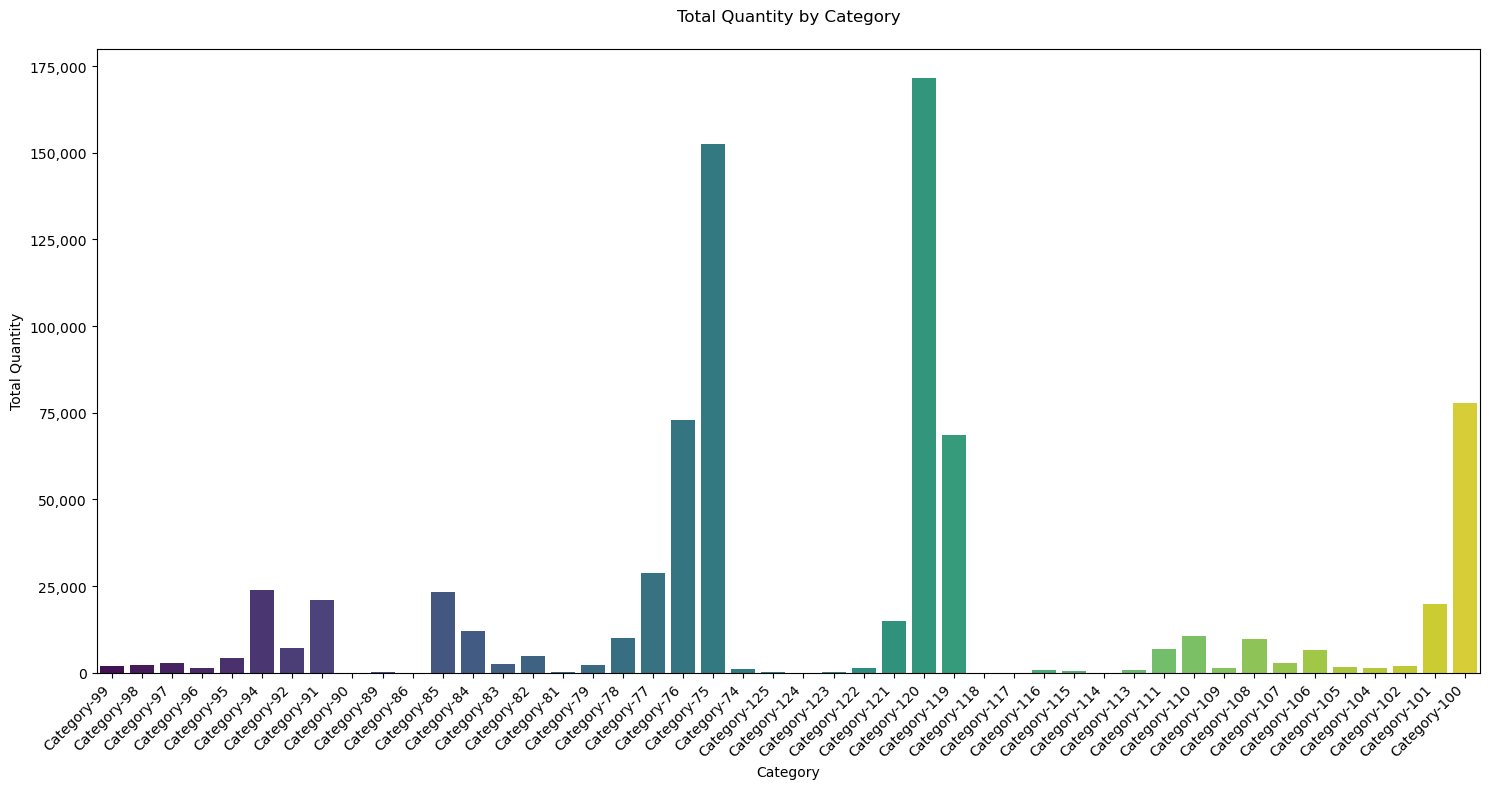

In [44]:

 #Sort values in salesby category
sales_by_category_sorted = sales_by_category.sort_values('Anonymized category', ascending = False)
# Create figure  size
plt.figure(figsize=(15, 8))

# Create barplot
sns.barplot(x='Anonymized category', y='Quantity', data=sales_by_category_sorted, palette='viridis')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Format y-axis labels with comma separator for thousands
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# Add title and labels
plt.title('Total Quantity by Category', pad=20)
plt.xlabel('Category')
plt.ylabel('Total Quantity')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()



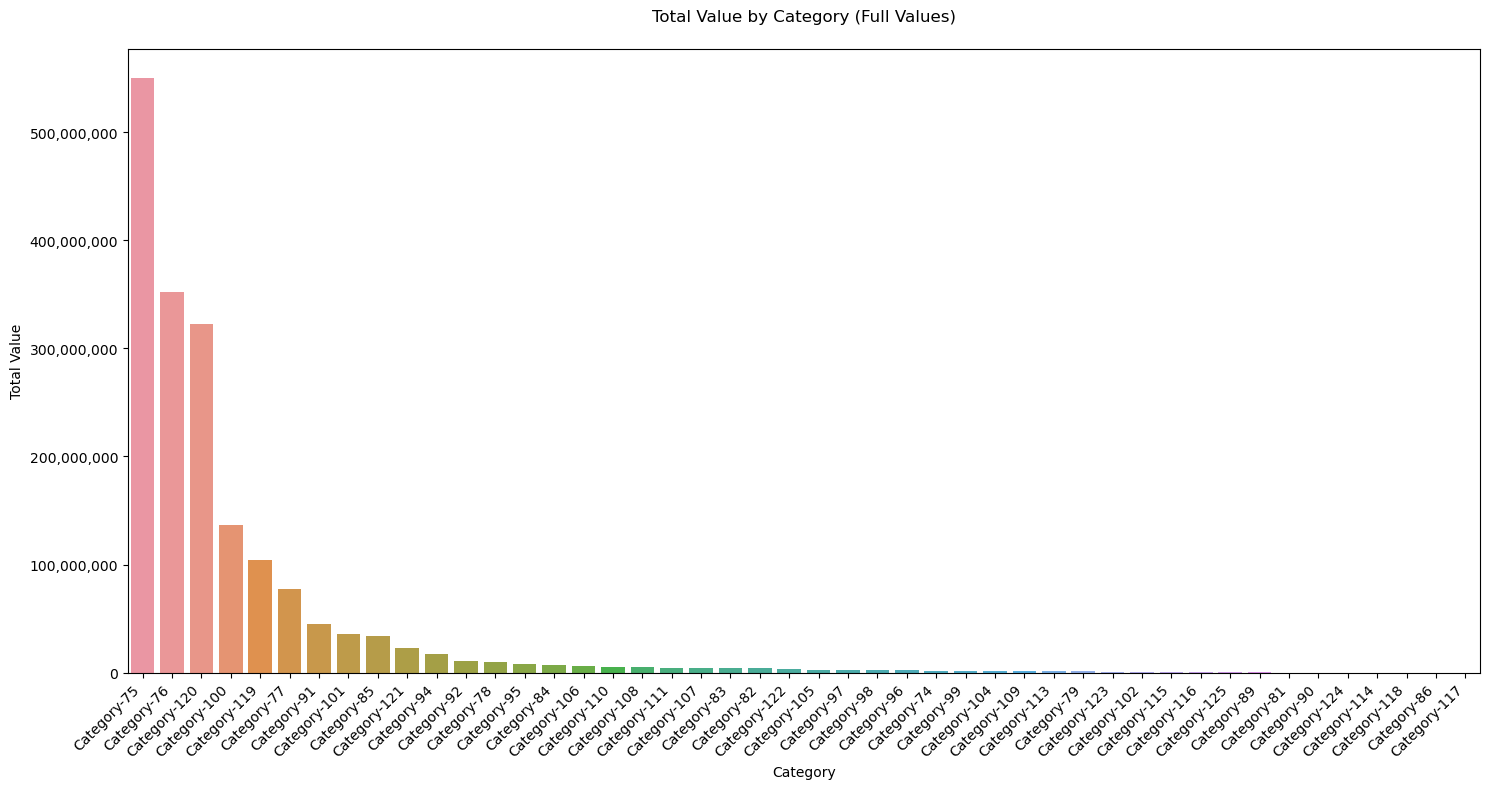

In [45]:
# Sort values in descending order
sales_by_category_sorted = sales_by_category.sort_values('Total_Value', ascending=False)

# Create a figure  size
plt.figure(figsize=(15, 8))

# Create the bar plot
sns.barplot(x='Anonymized category', y='Total_Value', data=sales_by_category_sorted)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Format y-axis labels to show full numbers instead of scientific notation
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# Add title and labels
plt.title('Total Value by Category (Full Values)', pad=20)
plt.xlabel('Category')
plt.ylabel('Total Value')

# Adjust layout to prevent label cutoff
plt.tight_layout()

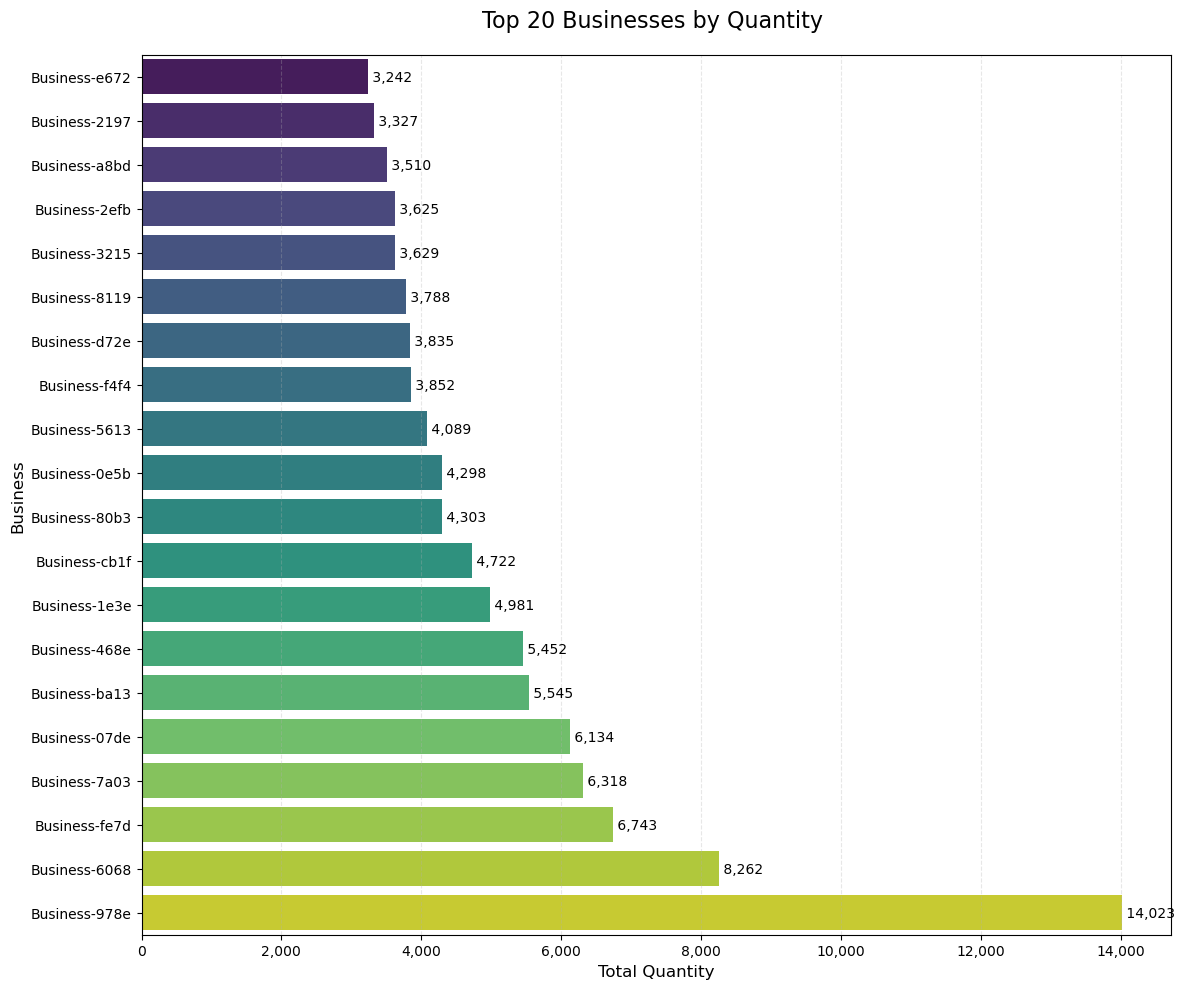

In [46]:
# Sort and get top 20 businesses
top_businesses = sales_by_business.sort_values('Quantity', ascending=True).tail(20)

# Create figure with larger width for business names
plt.figure(figsize=(12, 10))

# Create horizontal bar plot
sns.barplot(y='Anonymized business', 
            x='Quantity', 
            data=top_businesses,
            palette='viridis')

# Customize the plot
plt.title('Top 20 Businesses by Quantity ', fontsize=16, pad=20)
plt.xlabel('Total Quantity', fontsize=12)
plt.ylabel('Business', fontsize=12)

# Format x-axis with comma separator for thousands
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# Add gridlines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.3)

# Add value labels at the end of each bar
for i, v in enumerate(top_businesses['Quantity']):
    plt.text(v, i, f' {v:,}', va='center')

# Adjust layout to prevent label cutoff
plt.tight_layout()


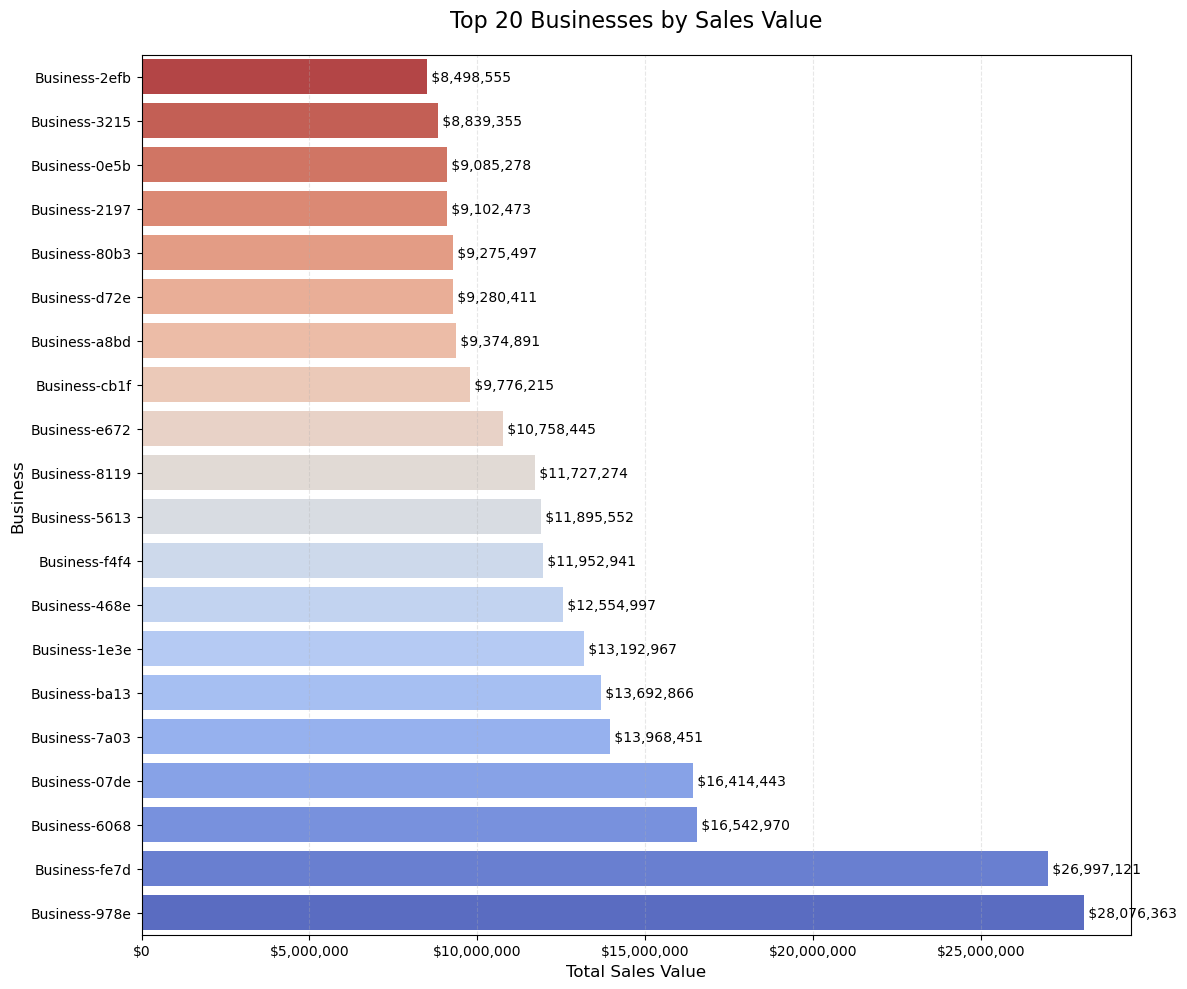

In [47]:
# Sort by Total_Value and get top 20
top_businesses = sales_by_business.sort_values('Total_Value', ascending=True).tail(20)

# Create figure size
plt.figure(figsize=(12, 10))

# Create horizontal bar plot
sns.barplot(y='Anonymized business', 
            x='Total_Value', 
            data=top_businesses,
            palette='coolwarm_r')  # Reversed coolwarm palette

# Customize the plot
plt.title('Top 20 Businesses by Sales Value', fontsize=16, pad=20)
plt.xlabel('Total Sales Value', fontsize=12)
plt.ylabel('Business', fontsize=12)

# Format axis with comma separator for thousands
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Add gridlines
plt.grid(axis='x', linestyle='--', alpha=0.3)

# Add value labels at the end of each bar
for i, v in enumerate(top_businesses['Total_Value']):
    plt.text(v, i, f' ${v:,.0f}', va='center')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

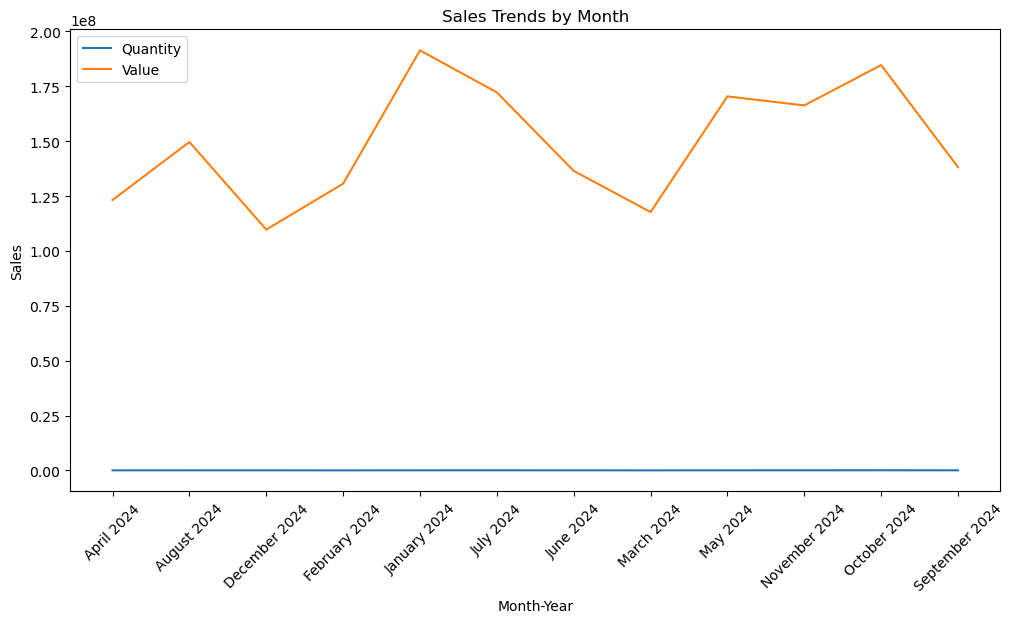

In [48]:
# Analyze monthly sales trends

monthly_sales = df1.groupby('Month-Year').agg({
    'Quantity': 'sum',
    'Total_Value': 'sum'
}).reset_index()
#Sort vales by month-year
monthly_sales = monthly_sales.sort_values('Month-Year')

# Create line plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Month-Year'], monthly_sales['Quantity'])
plt.plot(monthly_sales['Month-Year'], monthly_sales['Total_Value'])
plt.title('Sales Trends by Month')
plt.xlabel('Month-Year')
plt.ylabel('Sales')
plt.legend(['Quantity', 'Value'])
plt.xticks(rotation=45)
plt.show()

In [49]:
# Top 5 most frequently purchased products
top_quantity_products = df1.groupby('Anonymized product').agg({
    'Quantity': 'sum'
}).nlargest(5, 'Quantity')
print("Top 5 Most Frequently Purchased Products:")
print(top_quantity_products)

# Top 5 most valuable products  
top_value_products = df1.groupby('Anonymized product').agg({
    'Total_Value': 'sum'
}).nlargest(5, 'Total_Value')
print("\nTop 5 Most Valuable Products:")
print(top_value_products)

Top 5 Most Frequently Purchased Products:
                    Quantity
Anonymized product          
Product-66e0           47170
Product-e805           43577
Product-8f75           38032
Product-29ee           36639
Product-4156           28704

Top 5 Most Valuable Products:
                    Total_Value
Anonymized product             
Product-e805        268760281.0
Product-8f75        160773305.0
Product-66e0         71038955.0
Product-29ee         69722392.0
Product-4156         57413221.0


The most frequently bought product is Product-66e0  and the most valuable product is Product-e805  with sales value of 268,760,281.00.

##### Segmentation Analysis

In [50]:
# Group the dataset by 'Anonymized business' to calculate key business metrics
# Sum up the total quantity sold per business
 # Sum up the total sales value per business
 # Count the number of transactions per business
 # Rename 'Date' count to 'Transaction_Frequency' for clarity
business_metrics = df.groupby('Anonymized business').agg({
    
    'Quantity': 'sum', 
   
    'Total_Value': 'sum',
   
    'Date': 'count'
}).rename(columns={'Date': 'Transaction_Frequency'})

In [51]:
## Initialize the scaler
scaler = StandardScaler()
 #Apply standard scaling (zero mean, unit variance) to business metrics
scaled_metrics = scaler.fit_transform(business_metrics)

In [53]:
## Apply K-Means clustering to segment businesses into 3 clusters
# Initialize KMeans with 3 clusters and a fixed random state for reproducibility
# Fit the model to the scaled metrics
kmeans = KMeans(n_clusters=3, random_state=42)
business_metrics['Segment'] = kmeans.fit_predict(scaled_metrics)
# Mapping cluster numbers to descriptive labels
# Replace numerical segment labels with descriptive names
segment_map = {0: 'Low', 1: 'Medium', 2: 'High'}
business_metrics['Segment_Label'] = business_metrics['Segment'].map(segment_map)

##### Business Classification
##### High Value Businesses: 
These businesses generate the highest sales volume and revenue, often attracting premium clients. 
To strengthen their loyalty and maximize long-term value, the following strategies are recommended:
    
🔹 Offer loyalty programs such as rewards and ensure personalized account management, 
       provide customized products/services to strengthen the valuable customer relationships.
    
🔹 Develop bespoke offerings that cater to their specific needs, reinforcing their commitment to the brand.  

##### Medium Value Businesses: 
These businesses contribute to stable and consistent sales, making them a important for growth. 
Engagement strategies should focus on increasing purchase frequency:
    
🔹 Provide volume discounts for bulk orders and target them with promotions for complementary products to increase their loyalty.
    
🔹 Implement personalized marketing campaigns based on their purchase history to encourage repeat business. 
    
##### Low Value Businesses:
These businesses have a lower overall contribution to revenue but present opportunities for growth and re-engagement. 
The engagement strategies should focus on nurturing their interest and increasing their purchasing frequency:
    
🔹 Work on re-engaging them through cost-effective marketing campaigns like reactivation emails and 
social media ads can help grow their purchase activity over time.

🔹 Provide free samples, limited-time discounts, or entry-level products to encourage initial purchases.
    

### Forecasting

In [39]:
#from statsmodels.tsa.holtwinters import ExponentialSmoothing
#from statsmodels.tsa.arima.model import ARIMA

In [54]:
# ensure correct data type for our analysis
df1['Date'] = pd.to_datetime(df1['Date'])


In [55]:
#confirm the d -types
df1.dtypes

Date                   datetime64[ns]
Anonymized category            object
Anonymized product             object
Anonymized business            object
Anonymized location            object
Quantity                        int64
UnitPrice                     float64
Total_Value                   float64
Month-Year                     object
dtype: object

In [56]:
# Group sales data by 'Month-Year' and calculate the total sales value for each month
monthly_sales = df1.groupby('Month-Year',).agg({'Total_Value': 'sum'}).reset_index()
monthly_sales 

,Month-Year,Total_Value
0,April 2024,123188281.0
1,August 2024,149600209.0
2,December 2024,109713119.0
3,February 2024,130626309.0
4,January 2024,191349182.0
5,July 2024,172210289.0
6,June 2024,136459712.0
7,March 2024,117696757.0
8,May 2024,170372397.0
9,November 2024,166267139.0


In [57]:
# Reset index to start from 1 instead of 0
monthly_sales.index = monthly_sales.index + 1  
monthly_sales 

,Month-Year,Total_Value
1,April 2024,123188281.0
2,August 2024,149600209.0
3,December 2024,109713119.0
4,February 2024,130626309.0
5,January 2024,191349182.0
6,July 2024,172210289.0
7,June 2024,136459712.0
8,March 2024,117696757.0
9,May 2024,170372397.0
10,November 2024,166267139.0


In [59]:
# import required library
from statsmodels.tsa.arima.model import ARIMA

In [60]:
# Train ARIMA model with specified order (p=1, d=0, q=1)
# Forecast the next 3 periods (months) 
model = ARIMA(monthly_sales['Total_Value'], order=(1,0,1)).fit()
forecast = model.forecast(3)
# Print the forecasted values 
print(forecast)

13    1.435663e+08
14    1.506146e+08
15    1.488316e+08
Name: predicted_mean, dtype: float64


The ARIMA model forecasts the following sales value for the next 3 months;
143,566,300
150,614,600
148,831,600 

#### Anomalies Detection

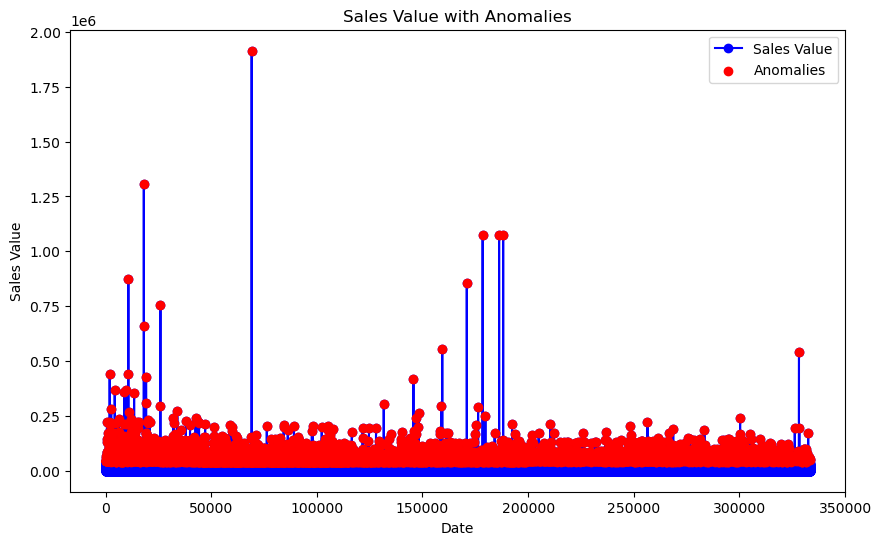

Anomalies Detected:
             Date Anonymized category Anonymized product Anonymized business  \
37     2024-01-03         Category-75       Product-1609       Business-dcd4   
112    2024-01-02         Category-75       Product-8f75       Business-1a5e   
115    2024-01-15         Category-75       Product-1196       Business-95a5   
132    2024-01-05         Category-75       Product-8f75       Business-80b3   
135    2024-01-05         Category-76       Product-e805       Business-80b3   
...           ...                 ...                ...                 ...   
332519 2024-12-31         Category-91       Product-3f76       Business-d7ac   
332973 2024-12-02         Category-75       Product-8b75       Business-4fcb   
333064 2024-12-04         Category-77       Product-b1c8       Business-1e3e   
333227 2024-12-17        Category-100       Product-e729       Business-a427   
333268 2024-12-11        Category-100       Product-572d       Business-6037   

       Anonymized l

In [61]:
# Calculate Z-scores to detect anomalies
df1['Z-Score'] = (df1['Total_Value'] - df1['Total_Value'].mean()) / df1['Total_Value'].std()

# Flag anomalies (e.g., Z-Score > 3 or < -3)
df1['Anomaly'] = df1['Z-Score'].apply(lambda x: True if abs(x) > 3 else False)

# Plot the data with anomalies highlighted
plt.figure(figsize=(10, 6))
plt.plot(df1.index, df1['Total_Value'], label='Sales Value', color='blue', marker='o')
plt.scatter(df1.index[df1['Anomaly']], df1['Total_Value'][df1['Anomaly']],
            color='red', label='Anomalies', zorder=5)
plt.title("Sales Value with Anomalies")
plt.xlabel("Date")
plt.ylabel("Sales Value")
plt.legend()
plt.show()

# Output the anomalies for investigation
print("Anomalies Detected:")
print(df1[df1['Anomaly']])

There are anomalies indicated by unusual spikes and  drops in sales performance based on Value and Quantity.

##### Unusual Spikes & unusual drops: 
    
The sudden increase in sales during a specific month might indicate a successful promotional eventor marketing campaign.

Seasons  such as holidays can lead to a spike or rise sales.

A drop in sales might be due to inventory issues or supply chain disruptions that lead to stock shortage.

A decrease in demand could be due to competitor activity(market competition) or new product launches by rivals thus affecting the business sales.




#### Correlation Analysis

In [63]:

# define a function to perform correlation analysis between 'Quantity' and 'Total_Value'
# Compute the correlation matrix for Quantity and Total_Value
def correlation_analysis(df1):
    correlation = df1[['Quantity', 'Total_Value']].corr()
    #the figure size
    plt.figure(figsize=(8,6))
    # Create a heatmap 
    sns.heatmap(correlation, annot=True)
    # label title to the heatmap
    plt.title('Correlation between Quantity and Value')
    
    return correlation

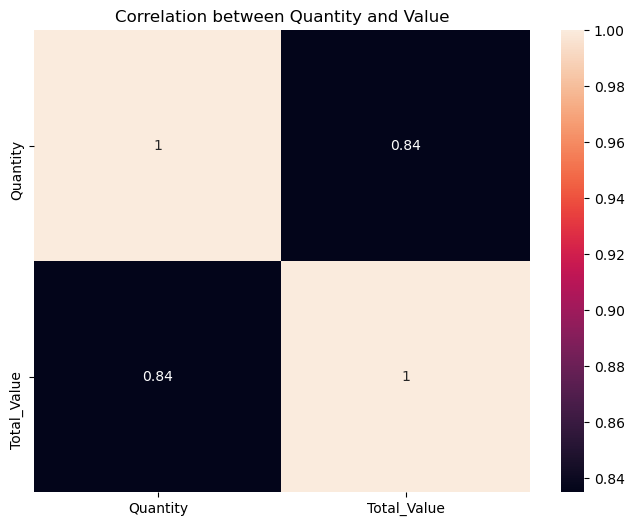

In [64]:
correlation = correlation_analysis(df1)

In [65]:
# # Correlation coefficient
correlation = df1[['Quantity', 'Total_Value']].corr()
correlation

,Quantity,Total_Value
Quantity,1.000000,0.835122
Total_Value,0.835122,1.000000


The correlation coefficient of 0.835 indicates a strong positive relationship between Quantity and Value. 
As the Quantity of the products sold increases, the  total value of sales tends to increase. This is potentially driven by
discounts or promotions encouraging bulk purchases or high-demand products.


#### Factors Driving Sales Performance:
1. Quality of the products:
    The quality of the products  could encourage larger purchases thus boosting both quantity sold and the sales value.
2. Seasonality:
     Specific times of the year may result to higher sales in quantity and value, influenced by holidays or trends.
3. Marketing strategies and promotions:
    Effective marketing campaigns increase awareness and as a result drive both quantity and value. 
    Promotions may also encourage bulk purcahses.
4. Pricing:
     Premium pricing leads to  increase in  Value per sale while lower prices may result to higher quantities sold.
        
    
    

### STRATEGIC INSIGHTS AND RECOMMENDATIONS 

### Product Strategy

In [63]:
# Grouping by Product Category to calculate total sales value and quantity sold
category_stats = df1.groupby('Anonymized category').agg(
    Total_Sales_Value=('Total_Value', 'sum'),
    Total_Quantity=('Quantity', 'sum')
).reset_index()

# Calculate Revenue Contribution (percentage of total sales value)
total_sales = category_stats['Total_Sales_Value'].sum()
category_stats['Revenue_Contribution'] = (category_stats['Total_Sales_Value'] / total_sales) * 100

# Rank categories by Sales Value and Quantity Sold (based on your prioritization criteria)
category_stats['Sales_Rank'] = category_stats['Total_Sales_Value'].rank(ascending=False)
category_stats['Quantity_Rank'] = category_stats['Total_Quantity'].rank(ascending=False)

# Sorting the DataFrame by both Sales and Quantity Rank (Higher ranks are more important)
category_stats = category_stats.sort_values(by=['Sales_Rank', 'Quantity_Rank'])

In [65]:
# Identify the top-performing product category
top_category = category_stats.iloc[0]
print("\nRecommended Category for Marketing: ", top_category['Anonymized category'])


Recommended Category for Marketing:  Category-75


In [66]:
# Display the DataFrame showing the calculated values
print(category_stats)

   Anonymized category  Total_Sales_Value  Total_Quantity  \
25         Category-75        549509348.0          152643   
26         Category-76        351827338.0           72928   
18        Category-120        322737950.0          171443   
0         Category-100        136417463.0           77704   
17        Category-119        103900839.0           68615   
27         Category-77         77791642.0           28825   
38         Category-91         44700098.0           21081   
1         Category-101         35964827.0           19782   
34         Category-85         34298630.0           23368   
19        Category-121         22677154.0           14936   
40         Category-94         16809234.0           23747   
39         Category-92         10595173.0            7037   
28         Category-78          9919076.0            9876   
41         Category-95          7546746.0            4156   
33         Category-84          6852610.0           12029   
5         Category-106  

The category-75 has the highest revenue contribution and quantity sold, making it the top-performing category.
Therefore,this category should be prioritized for marketing and promotion campaigns due to its high sales volume, revenue generation and customer demand.

### Customer Retention

In [91]:
# Convert 'Month-Year' to datetime
df1['Month-Year'] = pd.to_datetime(df1['Month-Year'], format='%B %Y')

# Calculate the frequency of purchases per business per month
df1['Month'] = df1['Month-Year'].dt.to_period('M')  # Extract the month and year

# Count purchases per business per month
business_monthly_purchase = df1.groupby(['Anonymized business', 'Month']).size().reset_index(name='Purchase Frequency')

# Pivot to create a matrix of business purchase frequency per month
business_monthly_purchase_pivot = business_monthly_purchase.pivot(index='Anonymized business', columns='Month', values='Purchase Frequency').fillna(0)

# Calculate the trend of purchase frequency by comparing the last month's frequency with earlier months
business_monthly_purchase_pivot['Frequency Trend'] = business_monthly_purchase_pivot.apply(
    lambda row: 'Decreasing' if row.iloc[-1] < row.iloc[0] else 'Stable/Increasing', axis=1
)

# Display businesses with decreasing purchase frequency
decreasing_businesses = business_monthly_purchase_pivot[business_monthly_purchase_pivot['Frequency Trend'] == 'Decreasing']
print(decreasing_businesses)

Month                2024-01  2024-02  2024-03  2024-04  2024-05  2024-06  \
Anonymized business                                                         
Business-00f8            5.0      5.0      0.0      0.0      0.0      0.0   
Business-016c           48.0     35.0     39.0     27.0     39.0     41.0   
Business-0197            9.0      0.0      0.0      0.0      0.0      0.0   
Business-01de           67.0     21.0     19.0      0.0     18.0     22.0   
Business-0204           44.0     33.0     26.0      8.0     16.0     19.0   
...                      ...      ...      ...      ...      ...      ...   
Business-fe7d           57.0     33.0     60.0     43.0     62.0     32.0   
Business-fed0           13.0     17.0      5.0      8.0      9.0      0.0   
Business-fef1          135.0    134.0    158.0    110.0     95.0     65.0   
Business-ff19           10.0      1.0      0.0      0.0      0.0      0.0   
Business-ffb1           43.0     25.0     14.0      0.0      0.0      0.0   

##### Re-engagement Strategies for Businesses with Decreased Purchase Frequency:
📌 Personalized Outreaches:
    Send personalized emails, share offer deals or discounts information for  businesses with low purchases.
    Introduce account managers for a more personal connection.
    
📌 Discounts and Offers:
    Provide discounts that are available for a limited period to create urgency and drive traffic.
    Offer discounts on bulk purchases to encourage high order volumes which will boost the sales.

📌 Loyalty:
    Create loyalty programs that rewards businesses with points or discounts for repeat purchases to encourage long-term relationships.
    
📌 Targeted Promotions:
    Allow access to the newly launched products and highlight the new product arrivals that might be of interest to the business.
    Effectively share updates about any improvements in the product range, customizations or upgardes that can appeal to the business.

📌 Seasons:
    Provide offers, special promotions or discounts based on the times of the year especially for seasonal products  that are relevant to the business.
    
📌 Feedback:
    Reach out to understand why the frequency of purchases has decreased and also send a surveys or directly inquire about any challenges they might be facing.
    Offer solutions or incentives based on the feedback received to improve their satisfaction
    and restore the frequency of purchases. 
    
 📌   Identify businesses that have reduced purchase frequency and focusing on slow-moving products or customers who previously bought high-demand items but have since stopped purchasing    

### Operational Efficiency

In [99]:
# Calculate total sales for each product based on Quantity and UnitPrice
df1['Total_Sales'] = df1['Quantity'] * df1['UnitPrice']

# Group data by product to get total sales and quantity sold over time
product_performance = df1.groupby(['Anonymized product', 'Month-Year']).agg(
    Total_Sales=('Total_Sales', 'sum'),
    Total_Quantity_Sold=('Quantity', 'sum')
).reset_index()

# Pivot data for better analysis of sales performance by product
product_performance_pivot = product_performance.pivot(
    index='Anonymized product', columns='Month-Year', values='Total_Sales').fillna(0)



In [100]:
# Identify best-performing products (based on total sales) and worst-performing products
best_performing_products = product_performance_pivot.sum(axis=1).sort_values(ascending=False)
worst_performing_products = product_performance_pivot.sum(axis=1).sort_values(ascending=True)

print("Best Performing Products:\n", best_performing_products.head())
print("Worst Performing Products:\n", worst_performing_products.head())

Best Performing Products:
 Anonymized product
Product-e805    268760281.0
Product-8f75    160773305.0
Product-66e0     71038955.0
Product-29ee     69722392.0
Product-4156     57413221.0
dtype: float64
Worst Performing Products:
 Anonymized product
Product-9393    0.0
Product-c1d6    0.0
Product-da0e    0.0
Product-38e9    0.0
Product-3dcf    0.0
dtype: float64


In [107]:
# Calculate the average sales per product
product_performance['Avg_Sales'] = product_performance.groupby('Anonymized product')['Total_Sales'].transform('mean')

# Define a threshold for restocking (e.g., if total sales fall below average sales)
restock_threshold = product_performance[product_performance['Total_Sales'] < product_performance['Avg_Sales']]

print("Restocking Needed Products:\n", restock_threshold[['Anonymized product', 'Total_Sales', 'Avg_Sales']])


Restocking Needed Products:
      Anonymized product  Total_Sales      Avg_Sales
2          Product-004f       9760.0   13013.333333
5          Product-02e4       9360.0   14655.000000
8          Product-02e4      10780.0   14655.000000
10         Product-031c      12900.0  219466.363636
11         Product-031c     102510.0  219466.363636
...                 ...          ...            ...
3635       Product-ff95     337680.0  433452.222222
3636       Product-ff95     372960.0  433452.222222
3639       Product-ff95     410360.0  433452.222222
3643       Product-ffa6      13675.0   41920.000000
3645       Product-ffb7          0.0     560.000000

[1850 rows x 3 columns]


The analysis above shows that fast- selling products such as Product-004f, Product-02e4, Product-031c and  Product-ff95 have total sales value below average indicating that they are selling out faster than they are restocked. 
This coud lead to customer dissatisfaction.



In [105]:
# Group by product and month-year to get the total sales per product per month
seasonal_demand = df1.groupby(['Anonymized product', 'Month-Year']).agg(
    Total_Sales=('Total_Value', 'sum')
).reset_index()

# Pivot data to have months as columns
seasonal_demand_pivot = seasonal_demand.pivot(
    index='Anonymized product', columns='Month-Year', values='Total_Sales').fillna(0)

# Calculate the average sales per month for each product
seasonal_demand_pivot['Avg_Sales'] = seasonal_demand_pivot.mean(axis=1)

# Identify months with higher sales than the average
seasonal_peaks = seasonal_demand_pivot.loc[:, seasonal_demand_pivot.columns != 'Avg_Sales']
#seasonal_peaks = seasonal_peaks.apply(lambda x: x > seasonal_demand_pivot['Avg_Sales'].to_numpy(), axis=1)
seasonal_peaks = seasonal_peaks > seasonal_demand_pivot['Avg_Sales'].values[:, None]


print("Seasonal Demand Peaks for Products:\n", seasonal_peaks)


Seasonal Demand Peaks for Products:
 Month-Year          2024-01-01 00:00:00  2024-02-01 00:00:00  \
Anonymized product                                             
Product-0001                      False                False   
Product-0031                       True                False   
Product-004f                      False                False   
Product-02e4                      False                False   
Product-031c                       True                False   
...                                 ...                  ...   
Product-fee0                       True                False   
Product-ff72                      False                False   
Product-ff95                      False                False   
Product-ffa6                      False                False   
Product-ffb7                      False                False   

Month-Year          2024-03-01 00:00:00  2024-04-01 00:00:00  \
Anonymized product                                             
Pr

#### Seasonal demand anaysis
    
1. Winter Peaks (Dec – Feb):
    Products like Product-031c and Product-0001  sells well in January and December respectively.
    This could be associated  with holiday shopping, warm clothing, or seasonal foods.

2. Spring & Summer Demand (Mar – Aug): 
    Product-ff95 and Product-004f  does so well in May, June and August respectively.
    Suggesting  demand in summer essentials and outdoor products.

3. Autumn & Back-to-School Surge (Sep – Nov):
    Product-004f and Product-ff95 see high demand in September & October, likely due to seasonal transitions.

4. Holiday Season & Year-End Demand (Nov – Dec):
    Product-ffa6 and Product-ff95 sales  peak in November & December, reflecting holiday shopping trends and gift-related purchases.






###### Recommendations to improvements inventory management and supply chain processes:
    
📌 Pre-stock seasonal products before peak demand periods and prioritize replenishment of low-stock, high-revenue items.

📌 Plan for smaller, frequent restocks for high-demand products to avoid overstocking and ensure you don’t run out of popular items during peak periods.

📌 Investigate stock shortages for products like Product-ffa6 and Product-ffb7 and collaborate with suppliers to reduce lead times and prevent stockouts.

📌 Enhance marketing efforts for underperforming products to boost sales and optimize low-selling Products.

📌 Use historical seasonal trends to improve demand forecasting  help in making restocking decisions..




